In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression
from xgboost import XGBRegressor
from sklearn import tree

from sklearn.metrics import (
    mean_squared_error,
    accuracy_score,
    classification_report,
    confusion_matrix,
)

plt.style.use("fivethirtyeight")

### Loading Data

In [2]:
data = pd.read_csv("../data/raw/Ecommerce_Consumer_Behavior_Analysis_Data.csv")
data.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [4]:
data.describe(include="all")

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
count,1000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000.000000,744,1000,1000,1000,1000,1000,1000,1000,1000.000000
unique,1000,NaN,8,2,4,3,2,969,24,989,...,NaN,3,3,5,344,2,2,4,3,NaN
top,37-611-6911,NaN,Female,High,Widowed,Bachelor's,High,Oslo,Electronics,$178.04,...,NaN,High,Desktop,PayPal,3/3/2024,True,False,Need-based,No Preference,NaN
freq,1,NaN,452,515,260,341,517,4,54,2,...,NaN,270,350,219,8,521,509,256,372,NaN
mean,NaN,34.304000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.399000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.547000
std,NaN,9.353238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.868454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.035849
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,34.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
75%,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


### Data Cleaning

In [5]:
# Looking at data.info() and checking against data, 'Purchase_Amount' could be converted to a float
data["Purchase_Amount"] = data["Purchase_Amount"].str.replace("$", "").astype(float)
assert data["Purchase_Amount"].dtype == "float64"

In [7]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=np.number)))
print(f"There are a total of {data[(z_scores > 3).all(axis = 1)].shape[0]} outliers")
print(f"There are a total of {data.duplicated().sum()} duplicated row(s)")

There are a total of 0 outliers
There are a total of 0 duplicated row(s)


In [ ]:
for col in data.columns:
    if data[col].isnull().sum() > 0:
        print(f"{col} has {data[col].isnull().sum()} null values")

print("---Handling missing values---")
data["Social_Media_Influence"] = data["Social_Media_Influence"].fillna(
    data["Social_Media_Influence"].mode()[0]
)  # Replace null values with mode
data["Engagement_with_Ads"] = data["Engagement_with_Ads"].fillna(
    data["Engagement_with_Ads"].mode()[0]
)  # Replace null values with mode
print(
    f"Total number of columns with missing values after clean up: {data.isnull().any().sum()}"
)

Social_Media_Influence has 247 null values
Engagement_with_Ads has 256 null values
---Handling missing values---
Total number of columns with missing values after clean up: 0


### Exploratory Data Analysis (EDA)

In [9]:
data.groupby("Income_Level")["Purchase_Amount"].mean()

Income_Level
High      275.511631
Middle    274.588433
Name: Purchase_Amount, dtype: float64

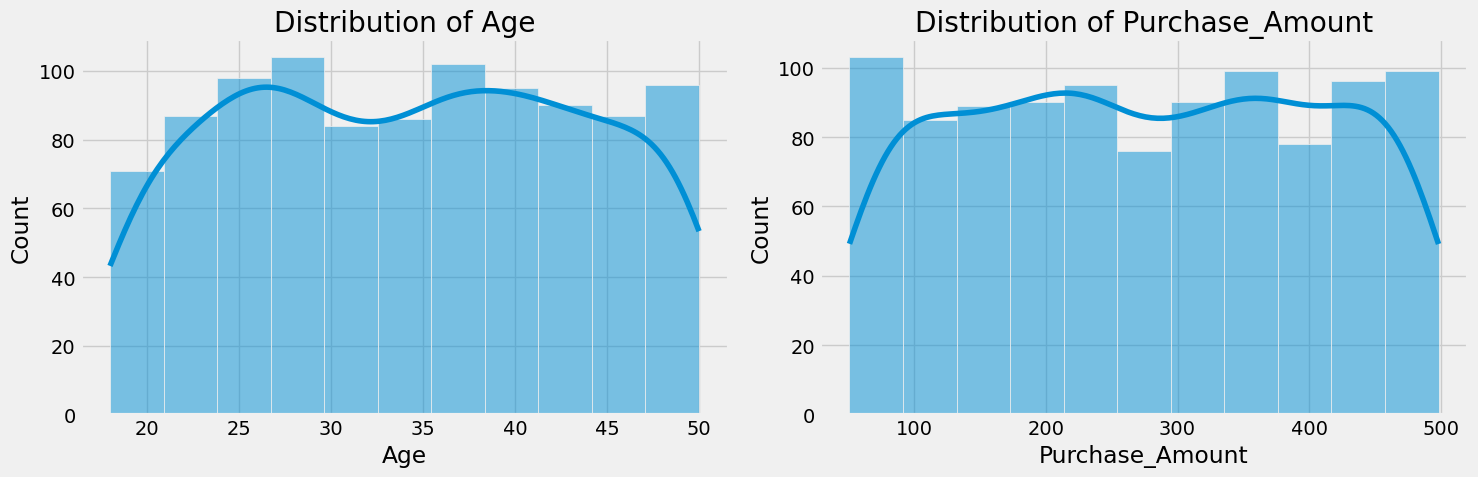

In [10]:
# Distribution of numerical features
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 5))
for i, col in enumerate(["Age", "Purchase_Amount"]):
    plt.subplot(1, 2, i + 1)
    sns.histplot(x=data[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

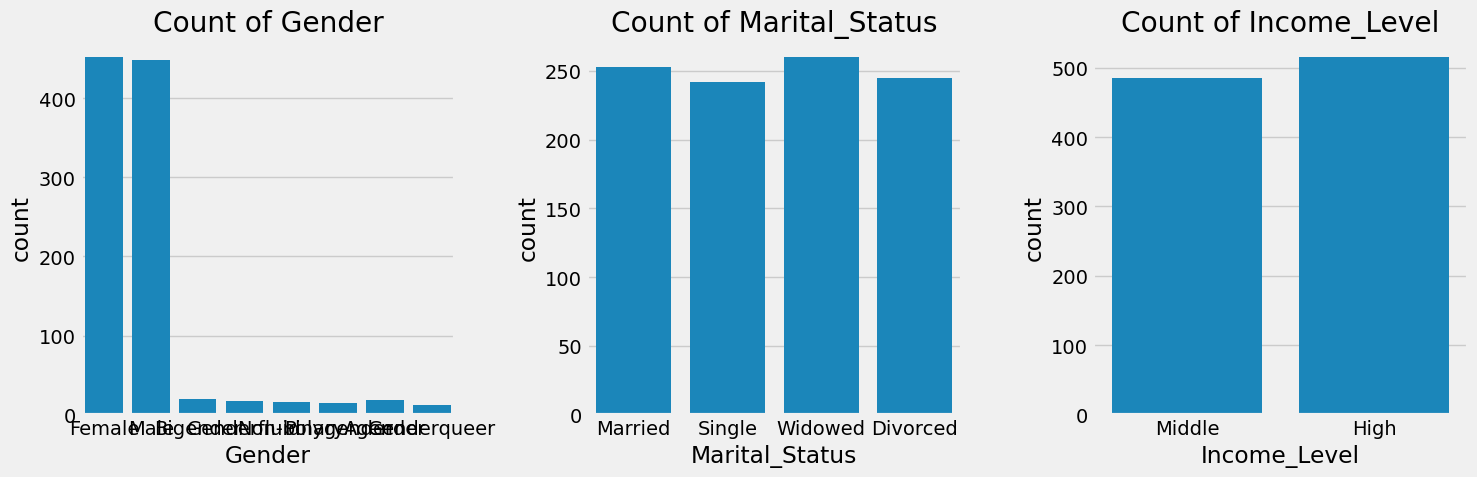

In [11]:
# Categorical feature counts
string_cols = data.select_dtypes(include="object").columns.tolist()
plt.figure(figsize=(15, 5))
for i, col in enumerate(["Gender", "Marital_Status", "Income_Level"]):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=data[col])
    plt.title(f"Count of {col}")
plt.tight_layout()
plt.show()

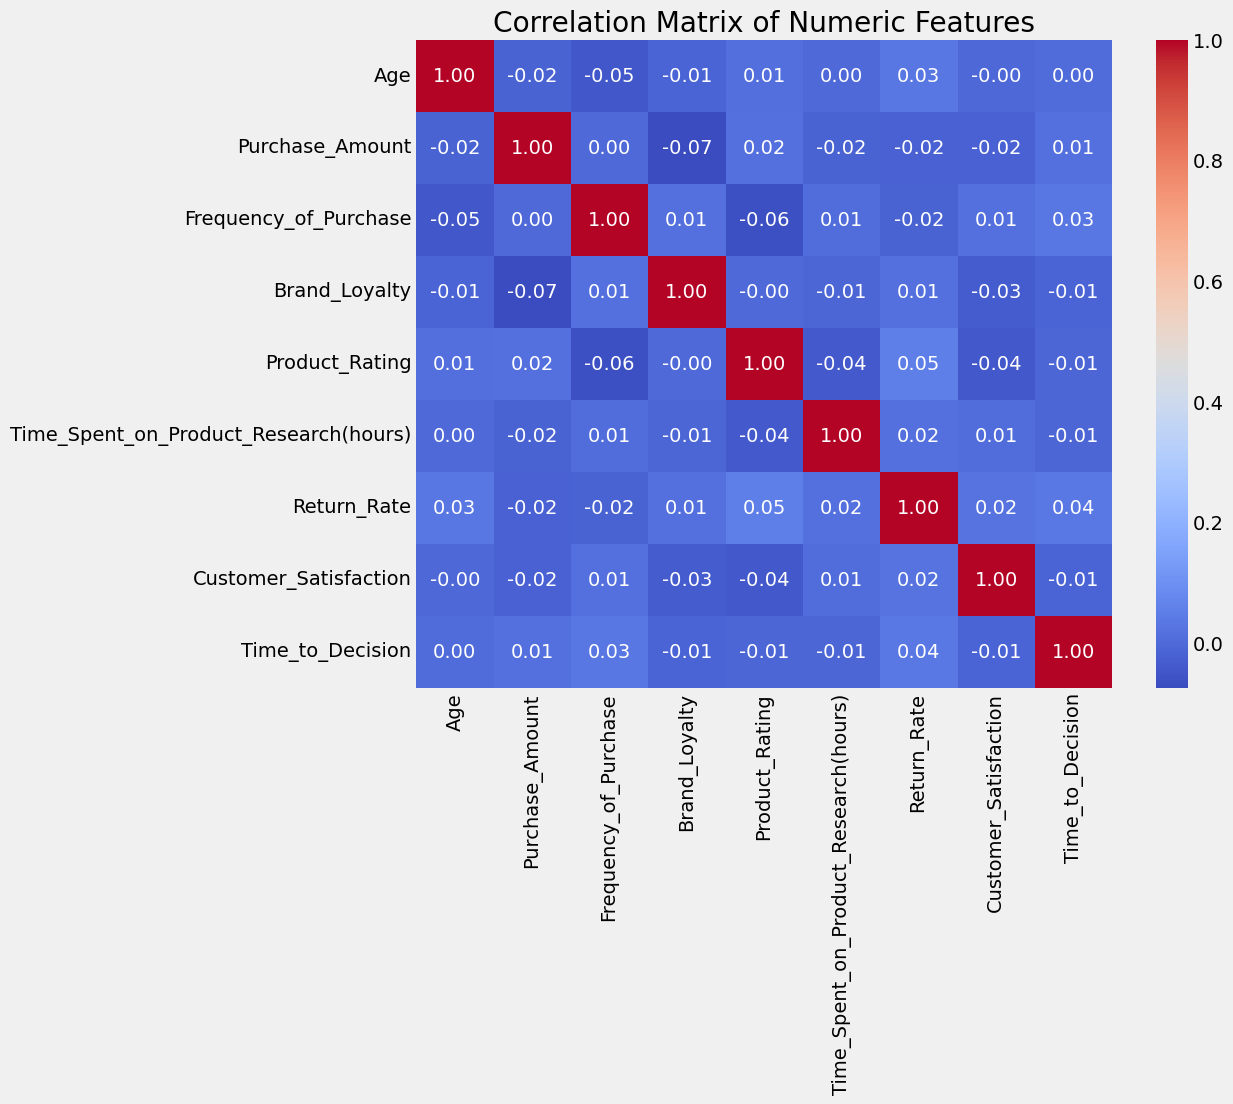

In [12]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

### Data Transformation & Feature Engineering

In [14]:
# One-hot encode categorical features
cols_to_onehot = (
    data[string_cols]
    .drop(["Customer_ID", "Time_of_Purchase", "Location"], axis=1)
    .columns.tolist()
)
data_encoded = pd.get_dummies(data, columns=cols_to_onehot, drop_first=True)
print("Categorical columns have been one-hot encoded.")

Categorical columns have been one-hot encoded.


In [15]:
# Drop irrelevant columns
data_final = data_encoded.drop(["Customer_ID", "Location", "Time_of_Purchase"], axis=1)

### Regression Analysis: Predicting Purchase_Amount

In [17]:
X_reg = data_final.drop("Purchase_Amount", axis=1)
y_reg = data_final["Purchase_Amount"]

# Scale numerical features (excluding the target)
scaler = StandardScaler()
X_reg_scaled = X_reg.copy()
numeric_features_reg = X_reg_scaled.select_dtypes(include=np.number).columns.tolist()
# numeric_features_reg = ['Age', 'Average_Session_Length', 'Customer_Satisfaction'] # 'Customer_Satisfaction' is now a feature
X_reg_scaled[numeric_features_reg] = scaler.fit_transform(
    X_reg_scaled[numeric_features_reg]
)

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)
print("Data split into training and testing sets for regression.")

Data split into training and testing sets for regression.


##### Linear Regression

In [18]:
# Linear Regression Model
reg = LinearRegression().fit(X_train_reg, y_train_reg)
y_pred_reg_lin = reg.predict(X_test_reg)
mse_lin = mean_squared_error(y_test_reg, y_pred_reg_lin)
rmse_lin = np.sqrt(mse_lin)
print(
    f"Linear Regression | MSE: {mse_lin:.2f}, RMSE: {rmse_lin:.2f}"
)  # Linear Regression | MSE: 18819.68, RMSE: 137.18

Linear Regression | MSE: 18819.68, RMSE: 137.18


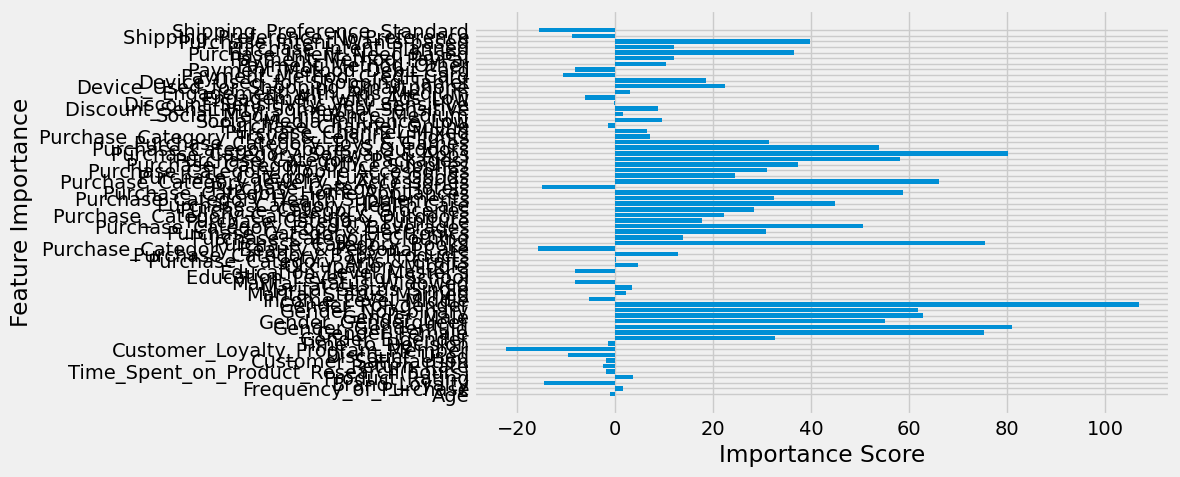

In [19]:
importance = reg.coef_
features = reg.feature_names_in_

plt.figure(figsize=(8, 5))
plt.barh(features, importance)
plt.xlabel("Importance Score")
plt.ylabel("Feature Importance")
plt.show()

##### XGBRegressor

In [20]:
# XGBoost Regression Model
xgbreg = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgbreg.fit(X_train_reg, y_train_reg)
y_pred_reg_xgb = xgbreg.predict(X_test_reg)
mse_xgb = mean_squared_error(y_test_reg, y_pred_reg_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print(
    f"XGBoost Regression | MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}"
)  # XGBoost Regression | MSE: 22890.67, RMSE: 151.30

XGBoost Regression | MSE: 22890.67, RMSE: 151.30


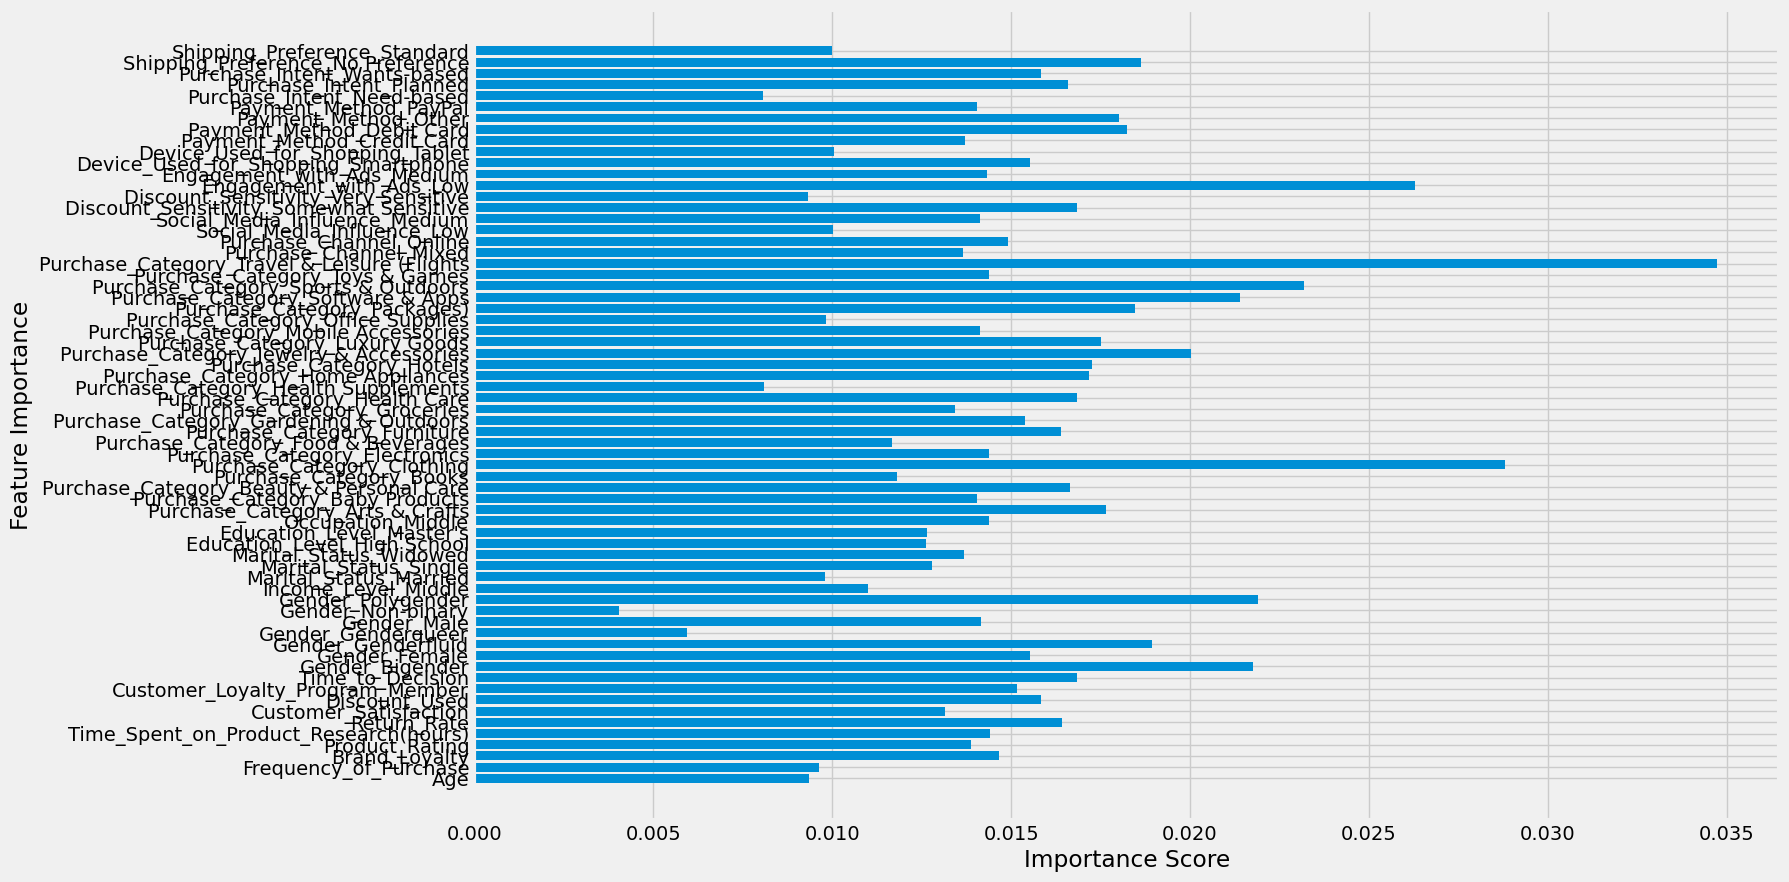

In [21]:
xgb_importance = xgbreg.feature_importances_
xgb_features = X_train_reg.columns

plt.figure(figsize=(15, 10))
plt.barh(xgb_features, xgb_importance)
plt.xlabel("Importance Score")
plt.ylabel("Feature Importance")
plt.show()

### Classification Analysis: Predicting Customer_Satisfaction

In [ ]:
# The target variable `Customer_Satisfaction` must be left unscaled
X_clf = data_final.drop("Customer_Satisfaction", axis=1)
y_clf = data_final["Customer_Satisfaction"].astype("category")
print("Defined features and target for classification.")

# Scale numerical features (excluding the target)
scaler_clf = StandardScaler()
X_clf_scaled = X_clf.copy()
numeric_features_clf = X_clf.select_dtypes(include=np.number).columns.tolist()
X_clf_scaled[numeric_features_clf] = scaler_clf.fit_transform(
    X_clf_scaled[numeric_features_clf]
)

# Split data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf_scaled, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)
print("Data split into training and testing sets for classification.")

Defined features and target for classification.
Data split into training and testing sets for classification.


#### Logistic Regression

In [25]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_clf, y_train_clf)
y_pred_clf_log = logreg.predict(X_test_clf)
acc_log = accuracy_score(y_test_clf, y_pred_clf_log)
print("\nLogistic Regression:")
print(f"Accuracy: {acc_log:.4f}")
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_clf_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf, y_pred_clf_log))


Logistic Regression:
Accuracy: 0.0850
Classification Report:
              precision    recall  f1-score   support

           1       0.05      0.05      0.05        22
           2       0.13      0.15      0.14        20
           3       0.00      0.00      0.00        21
           4       0.11      0.10      0.11        20
           5       0.12      0.12      0.12        17
           6       0.08      0.09      0.09        22
           7       0.11      0.10      0.10        20
           8       0.00      0.00      0.00        20
           9       0.22      0.24      0.23        21
          10       0.00      0.00      0.00        17

    accuracy                           0.09       200
   macro avg       0.08      0.08      0.08       200
weighted avg       0.08      0.09      0.08       200

Confusion Matrix:
[[1 1 1 5 1 2 4 2 3 2]
 [3 3 0 2 1 5 1 1 2 2]
 [3 4 0 1 2 4 0 3 2 2]
 [3 3 3 2 3 3 1 2 0 0]
 [3 1 5 1 2 1 0 1 2 1]
 [2 2 4 4 1 2 2 1 4 0]
 [1 3 3 0 2 1 2 5 1 2]


In [26]:
# Decision Tree Classifier
clf_tree = tree.DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train_clf, y_train_clf)
y_pred_clf_tree = clf_tree.predict(X_test_clf)
acc_tree = accuracy_score(y_test_clf, y_pred_clf_tree)
print("\nDecision Tree Classifier:")
print(f"Accuracy: {acc_tree:.4f}")
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_clf_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf, y_pred_clf_tree))


Decision Tree Classifier:
Accuracy: 0.1100
Classification Report:
              precision    recall  f1-score   support

           1       0.15      0.14      0.14        22
           2       0.06      0.05      0.05        20
           3       0.05      0.05      0.05        21
           4       0.08      0.05      0.06        20
           5       0.17      0.12      0.14        17
           6       0.12      0.14      0.13        22
           7       0.17      0.20      0.18        20
           8       0.09      0.15      0.12        20
           9       0.14      0.14      0.14        21
          10       0.08      0.06      0.07        17

    accuracy                           0.11       200
   macro avg       0.11      0.11      0.11       200
weighted avg       0.11      0.11      0.11       200

Confusion Matrix:
[[3 2 2 2 0 1 3 4 1 4]
 [1 1 3 1 0 3 2 4 5 0]
 [4 1 1 3 2 2 2 3 2 1]
 [3 2 1 1 0 2 4 4 3 0]
 [2 2 1 0 2 2 3 3 1 1]
 [1 4 4 2 1 3 1 3 1 2]
 [1 1 5 2 0 1 4 2 